 Fs=1000 hz
 Ts=0.001 s
Frecuencia cardíaca: 90.00 bpm


(0.0, 500.0)

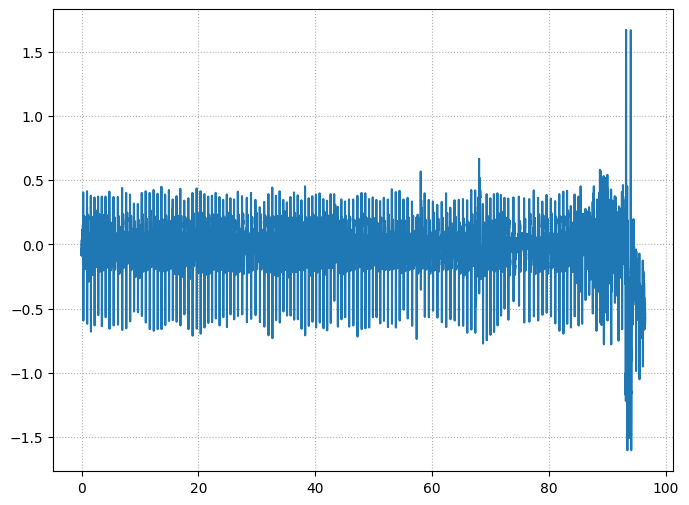

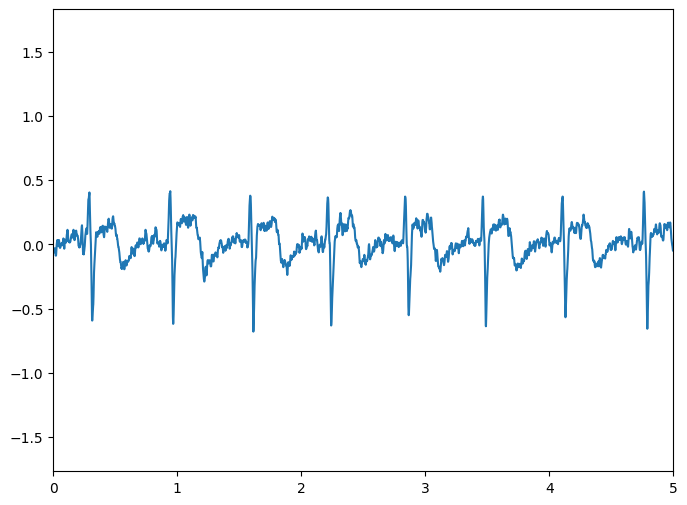

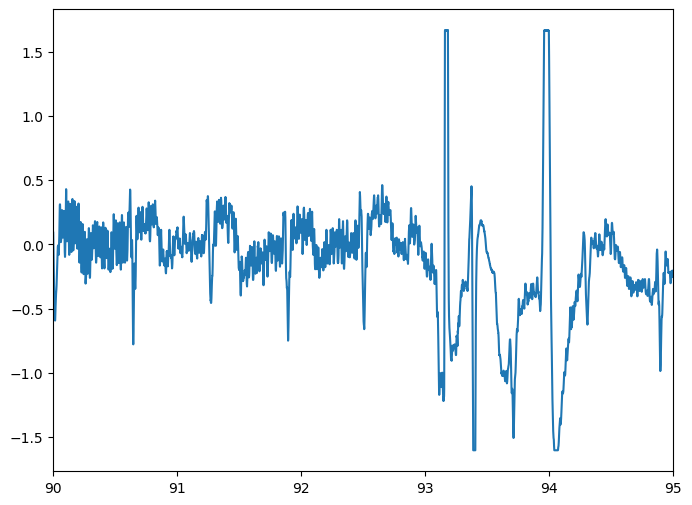

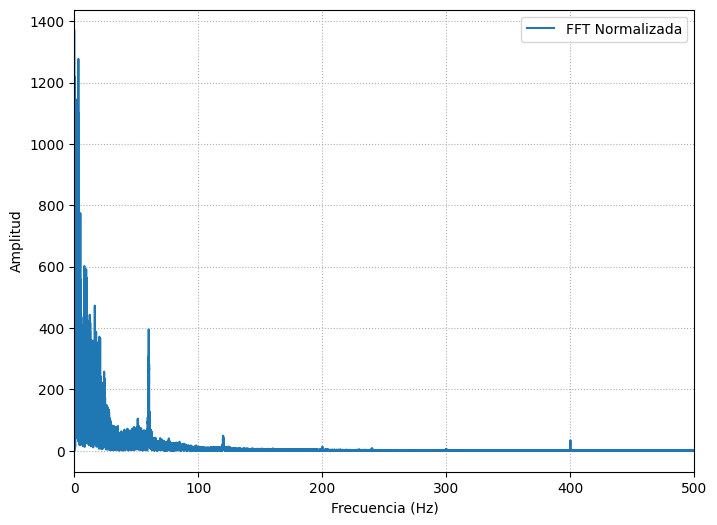

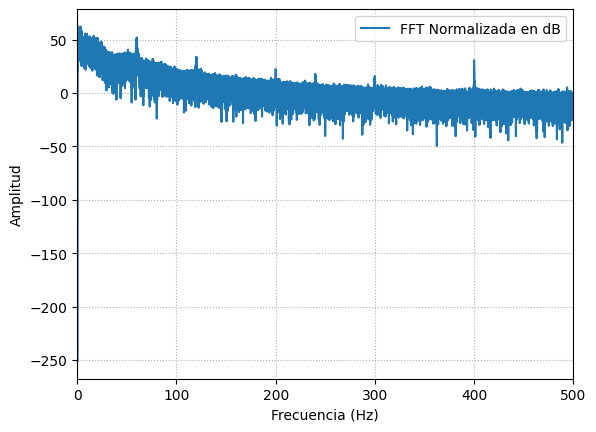

In [7]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
import re
from scipy import signal
from scipy.signal import medfilt, iirnotch, butter, filtfilt

f = open("ECG_Prosim_ejercicio.txt","r")
raw_data = f.read()  # con f.read() leemos todo el contenido
f.close()

raw_data
Fs = 1000
Ts = 1/Fs
print(f" Fs={Fs} hz\n Ts={Ts} s")

a = np.genfromtxt("./ECG_Prosim_ejercicio.txt", delimiter="\t",skip_header = 3)
yarray = a[:, 5]
N=len(yarray)
bits = 10 # Bits de la salida
volt_range = 3.3
yarray = (yarray/2**bits -1/2) * volt_range/1009
yarray=yarray*1000 # convertir los bits a mV
yarray = yarray - np.mean(yarray)
xarray = np.arange(1, len(yarray)+1)/Fs
xarray=xarray

plt.figure(figsize=(8, 6))
plt.plot(xarray, yarray, label="señal")
plt.grid(linestyle=":")


plt.figure(figsize=(8, 6))
plt.plot(xarray, yarray, label="señal")
plt.xlim(0,5)

plt.figure(figsize=(8, 6))
plt.plot(xarray, yarray, label="señal")
plt.xlim(90,95)

#BPM
threshold = -0.5
above_threshold = np.where(yarray[0:40000] < threshold)[0]
new_array = []
for i in range(len(above_threshold)):
  if i == 0 or above_threshold[i] != above_threshold[i - 1] + 1:
    new_array.append(above_threshold[i])
num_beats = len(new_array)
bpm = (num_beats / 40.0) * 60.0
print("Frecuencia cardíaca: {:.2f} bpm".format(bpm))


signal_fft = np.fft.fft(yarray)
frequencies = np.fft.fftfreq(N, Ts)


frequencies = np.fft.fftshift(frequencies)
signal_fft = np.fft.fftshift(signal_fft)
plt.figure(figsize=(8, 6))
plt.plot(frequencies, np.abs(signal_fft), label="FFT Normalizada")
plt.grid(linestyle=":")
plt.xlabel("Frecuencia (Hz)")
plt.ylabel("Amplitud")
plt.legend(loc="upper right")
plt.xlim(0, Fs/2)

plt.figure()
plt.plot(frequencies, 20*np.log10(np.abs(signal_fft)), label="FFT Normalizada en dB")
plt.grid(linestyle=":")
plt.xlabel("Frecuencia (Hz)")
plt.ylabel("Amplitud")
plt.legend(loc="upper right")
plt.xlim(0, Fs/2)
